In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
data=pd.read_csv("bank.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [14]:
data.shape

(11162, 17)

In [16]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [17]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [18]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


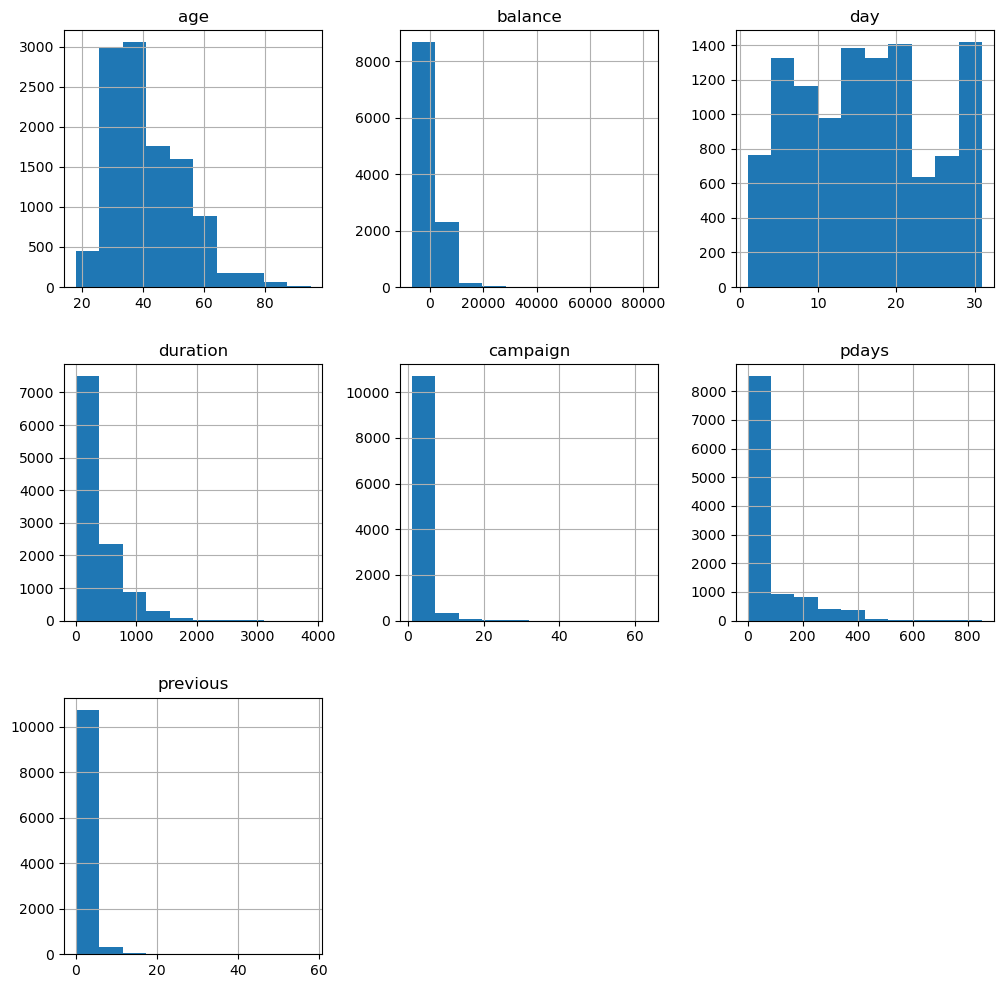

In [20]:
data.hist(figsize=(12,12))
plt.show()

In [22]:
cat_cols=data.select_dtypes(include="object").columns
print(cat_cols)

num_cols=data.select_dtypes(exclude="object").columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


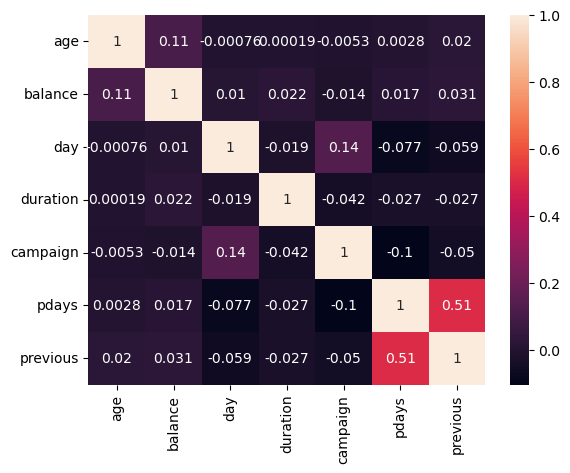

In [25]:
numeric_data=data.drop(columns=cat_cols)
corr=numeric_data.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [27]:
lb=LabelEncoder()
data_encoded=data.apply(lb.fit_transform)
data_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,15,1,2,0,0,425,1,0,0,19,0,255,0,0,0,3,0
11158,21,7,1,1,0,1149,0,0,2,15,6,81,3,0,0,3,0
11159,14,9,2,1,0,453,0,0,0,18,1,154,1,0,0,3,0
11160,25,9,1,1,0,424,0,1,0,7,8,7,1,155,5,0,0


In [31]:
x=data_encoded.drop("deposit",axis=1)
y=data_encoded["deposit"]

In [32]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,15,1,2,0,0,425,1,0,0,19,0,255,0,0,0,3
11158,21,7,1,1,0,1149,0,0,2,15,6,81,3,0,0,3
11159,14,9,2,1,0,453,0,0,0,18,1,154,1,0,0,3
11160,25,9,1,1,0,424,0,1,0,7,8,7,1,155,5,0


In [33]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int32

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [35]:
model=DecisionTreeClassifier(max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [36]:
def eval(y_test,y_pred):
    accuracy=accuracy_score(y_test,y_pred)
    print("Accuracy: ",accuracy)
    
    cm=confusion_matrix(y_test,y_pred)
    print("Confusion: ",cm)
    
    cr=classification_report(y_test,y_pred)
    print("Classification: ",cr)
    

In [37]:
def score(model):
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    print("Training: ",train_score)
    print("Testing: ",test_score)

In [39]:
score(model)

Training:  0.7980736924627618
Testing:  0.793551276309897


In [40]:
y_pred=model.predict(x_test)
print(y_pred)

[1 1 0 ... 1 0 0]


In [41]:
eval(y_test,y_pred)

Accuracy:  0.793551276309897
Confusion:  [[951 183]
 [278 821]]
Classification:                precision    recall  f1-score   support

           0       0.77      0.84      0.80      1134
           1       0.82      0.75      0.78      1099

    accuracy                           0.79      2233
   macro avg       0.80      0.79      0.79      2233
weighted avg       0.80      0.79      0.79      2233



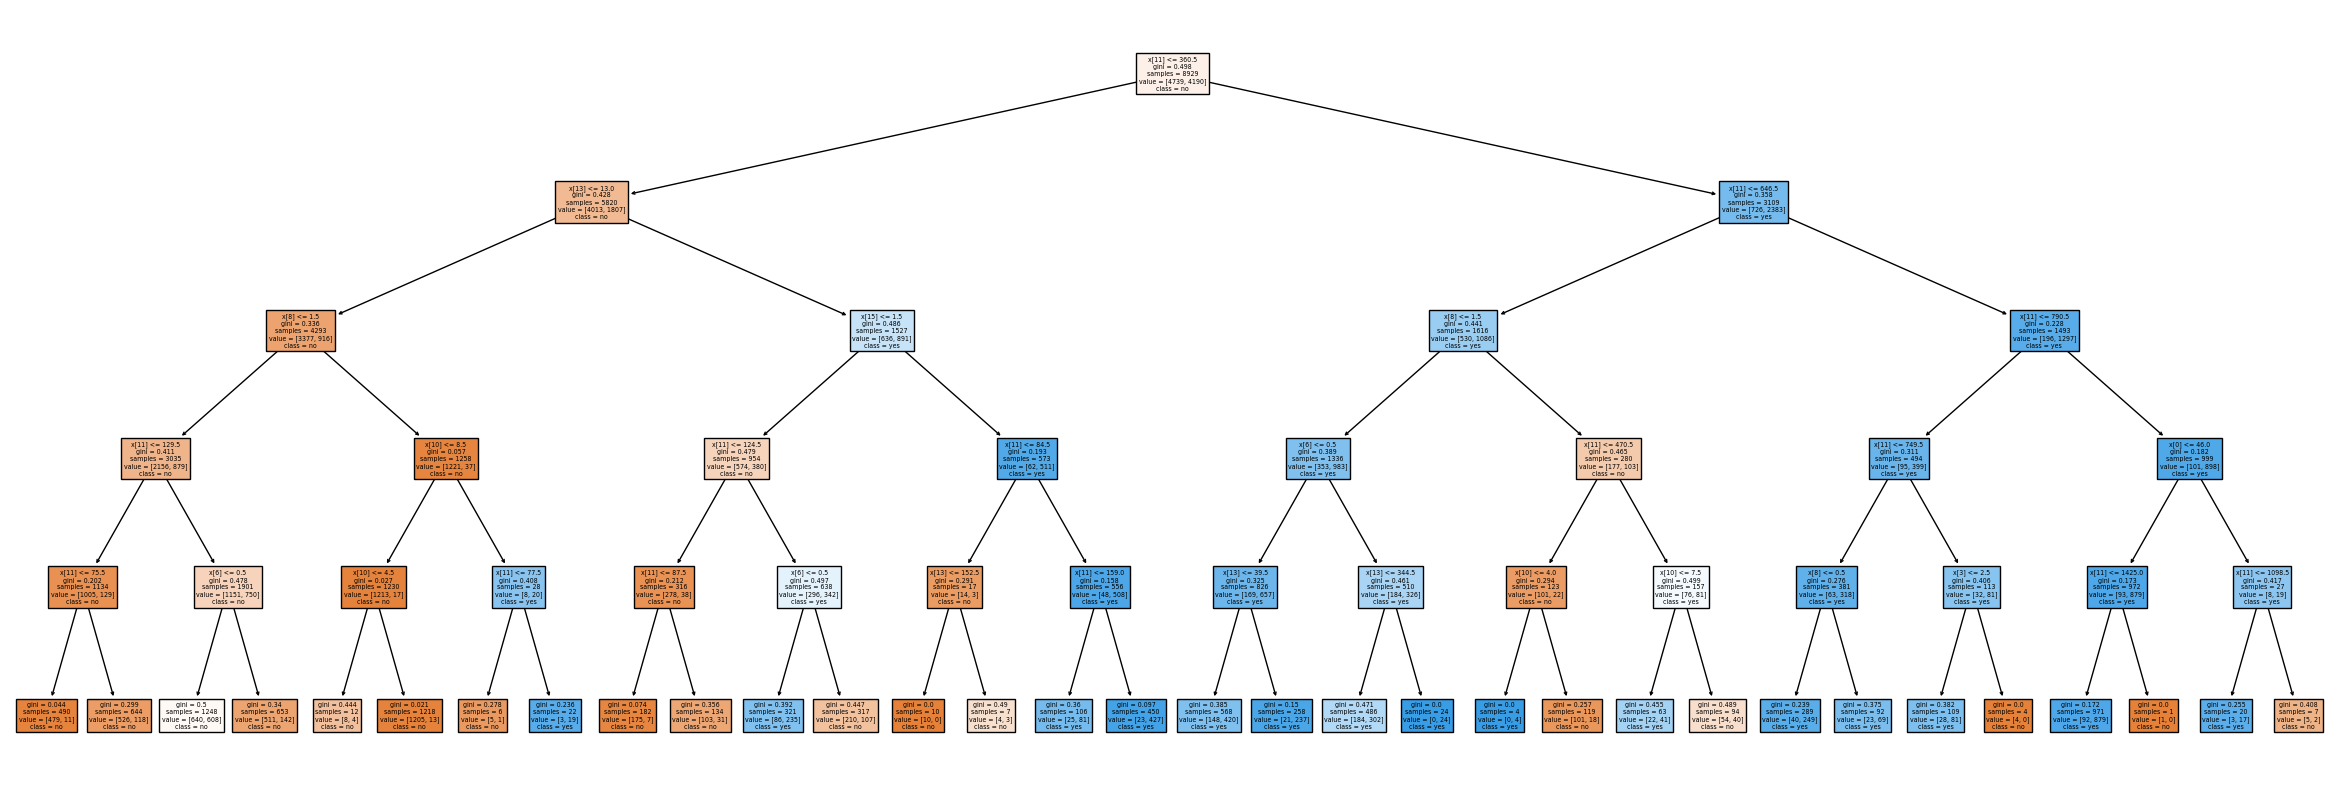

In [42]:
plt.figure(figsize=(30,10))
plot_tree(model,class_names=["no","yes"],filled=True)
plt.show()